<a href="https://colab.research.google.com/github/kacpercierpiak/AED_LAB/blob/main/AED_L_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORYTMY I EKSPLORACJA DANYCH**
# *LAB5 - Uczenie zespołowe*

In [1]:
import requests, zipfile, io
rootPath = './LAB4'
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00341/HAPT%20Data%20Set.zip'
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall(rootPath)

##Zadanie 1


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
X_train = np.genfromtxt(rootPath+'/Train/X_train.txt',delimiter=' ')
y_train = np.genfromtxt(rootPath+'/Train/y_train.txt',delimiter=' ')
X_test = np.genfromtxt(rootPath+'/Test/X_test.txt',delimiter=' ')
y_test = np.genfromtxt(rootPath+'/Test/y_test.txt',delimiter=' ')

###Zadanie 2
Wykorzystując zbiór danych z poprzednich laboratoriów wykonaj uczenie zespołowe

In [9]:
def model_desc(pred):
             conf = metrics.confusion_matrix(y_test, pred)
             plt.imshow(conf, interpolation='nearest')
             plt.show()
             print("Accuracy: ",metrics.accuracy_score(y_test, pred))
             print("Recall: ", metrics.recall_score(y_test, pred,average='macro'))
             print("F1: ", metrics.f1_score(y_test, pred,average='macro'))
             fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=2)
             print("AUC: ",metrics.auc(fpr, tpr) )

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection

estimators = []
model1 = KNeighborsClassifier(n_neighbors=7)
estimators.append(('knn', model1))
model2 = DecisionTreeClassifier(min_samples_split=3, min_samples_leaf=2)
estimators.append(('cart', model2))
model3 = SVC(kernel='linear',C=0.26)
estimators.append(('svm', model3))
ensemble = VotingClassifier(estimators)
resultsVoting = model_selection.cross_val_score(ensemble, X_train, y_train)
print('Cross Validation', resultsVoting.mean())

Cross Validation 0.9199222495423397


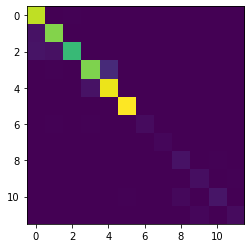

Accuracy:  0.9275774826059456
Recall:  0.8507282499010599
F1:  0.8624536350835696
AUC:  0.19524663875259282


In [12]:
ensemble.fit(X_train, y_train)
pred = ensemble.predict(X_test)
model_desc(pred)

In [17]:
df = pd.DataFrame(X_test)
df['Pred'] = pred
filepath = 'ensemble_learning.xlsx'

df.to_excel(filepath, index=False)

###Zadanie 3
Wykorzystując zbiór danych z poprzednich laboratoriów wykonaj uczenie zespołowe stosując
agregację klasyfikatorów

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10)
estimators = []
model1 = BaggingClassifier(KNeighborsClassifier(n_neighbors=7))
estimators.append(('knn', model1))
model2 = BaggingClassifier(DecisionTreeClassifier(min_samples_split=3, min_samples_leaf=2))
estimators.append(('cart', model2))
model3 = BaggingClassifier(SVC(kernel='linear',C=0.26))
estimators.append(('svm', model3))
ensembleBagging = VotingClassifier(estimators)
resultsBagging = model_selection.cross_val_score(ensembleBagging, X_train, y_train, cv=kfold)
print('Cross Validation', resultsBagging.mean())

Cross Validation 0.9203097587514844


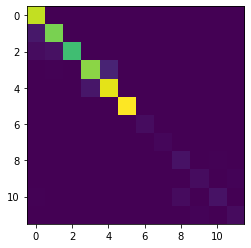

Accuracy:  0.928842504743833
Recall:  0.8439998075948315
F1:  0.8546130566150757
AUC:  0.19185600188092572


In [46]:
ensembleBagging.fit(X_train, y_train)
predBagging = ensembleBagging.predict(X_test)
model_desc(predBagging)

In [31]:
df = pd.DataFrame(X_test)
df['Pred'] = predBagging
filepath = 'aggregating.xlsx'

df.to_excel(filepath, index=False)

###Zadanie 4
Wykonaj tożsame zadanie klasyfikacji jak w poprzednich ćwiczeniach dla następujących
metod uczenia zespołowego przyjmując domyślne parametry:
- ADABoost
- XGBoost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
modelAda = AdaBoostClassifier()

resultsAda = model_selection.cross_val_score(modelAda, X_train, y_train)
print('Cross Validation', resultsAda.mean())

Cross Validation 0.5249137924604763


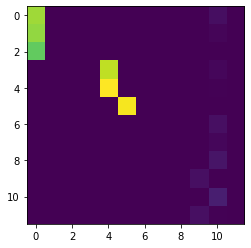

Accuracy:  0.5196078431372549
Recall:  0.40262077336156094
F1:  0.2760728174057613
AUC:  0.17827688583711848


In [62]:
modelAda.fit(X_train, y_train)
predAda = modelAda.predict(X_test)
model_desc(predAda)

In [63]:
df = pd.DataFrame(X_test)
df['Pred'] = predAda
filepath = 'boostingAda.xlsx'

df.to_excel(filepath, index=False)

In [72]:
import xgboost as xgb
modelXgb = xgb.XGBClassifier()
resultsXgb = model_selection.cross_val_score(modelXgb, X_train, y_train, cv=2)
print('Cross Validation', resultsXgb.mean())

Cross Validation 0.8998334192218158


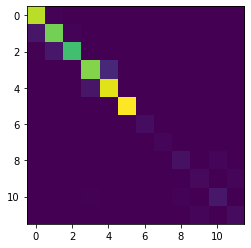

Accuracy:  0.9259962049335864
Recall:  0.8378306371351335
F1:  0.8329979060141509
AUC:  0.18779631089240617


In [74]:
modelXgb.fit(X_train, y_train)
predXgb = modelXgb.predict(X_test)
model_desc(predXgb)

In [75]:
df = pd.DataFrame(X_test)
df['Pred'] = predXgb
filepath = 'boostingXgb.xlsx'

df.to_excel(filepath, index=False)

###Zadanie 5
Porównaj wyniki klasyfikacji wszystkich metod uczenia zespołowego w zbiorczej tabeli na
podstawie następujących kryteriów:

In [76]:
def desc_fun(pred):
  acc = metrics.accuracy_score(y_test, pred)
  recall = metrics.recall_score(y_test, pred,average='macro')
  f1 = metrics.f1_score(y_test, pred,average='macro')
  fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=2)
  auc = metrics.auc(fpr, tpr)
  return [acc, recall,f1,auc]

In [77]:
result = []
result.append(desc_fun(pred))
result.append(desc_fun(predBagging))
result.append(desc_fun(predAda))
result.append(desc_fun(predXgb))
df = pd.DataFrame(data=result, columns=["acc", "recall", "f1", "auc"], index=["ensemble_learning","Bagging","Ada","XGB"])
filepath = 'comparison.xlsx'

df.to_excel(filepath, index=False)

In [78]:
df

,acc,recall,f1,auc
ensemble_learning,0.927577,0.850728,0.862454,0.195247
Bagging,0.928843,0.844000,0.854613,0.191856
Ada,0.519608,0.402621,0.276073,0.178277
XGB,0.925996,0.837831,0.832998,0.187796
